In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('schizophrenia.xlsx')

# Dropping columns with >40% missing values
df = df.dropna(thresh=len(df) * 0.6, axis=1)

In [73]:

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('UNKNOWN')
    else:
        df[col] = df[col].fillna(df[col].median())

In [74]:
df["CLASS"] = df["CLASS"].str.strip().str.upper()
df["CLASS"] = df["CLASS"].replace({
    "SHIZ": "SCHIZ",
    "SHICZ": "SCHIZ"
})

In [75]:
# dropping the year table,since it isnt a time-series analysis
df = df.drop(columns=['YEAR'])

# dropping 'DIAGN' if it's redundant
if 'DIAGN' in df.columns:
    df = df.drop(columns=['DIAGN'])


In [76]:
# Label encoder
label_encoders = {}

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)  # Convert all entries to string
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

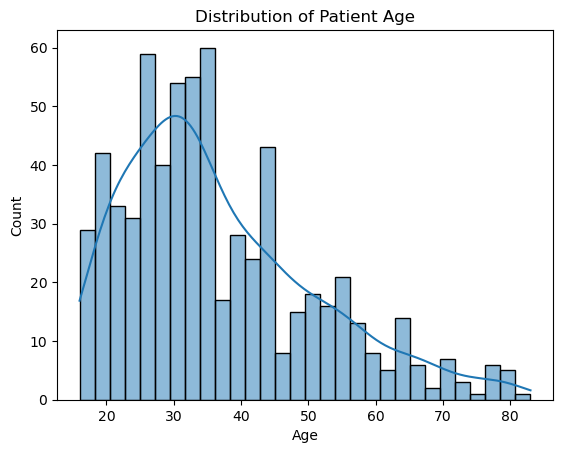

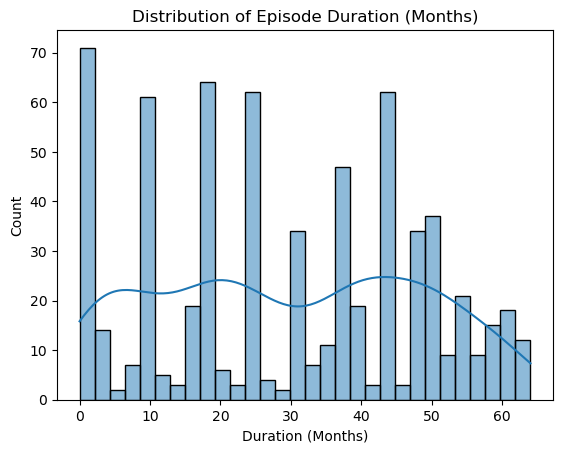

In [77]:


# Age Distribution
sns.histplot(df['AGE'], kde=True, bins=30)
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig('my_plot_AGE.png', dpi=300, bbox_inches='tight') 
plt.show()

# Duration of Episode
sns.histplot(df['DUR_EPIS'], kde=True, bins=30)
plt.title("Distribution of Episode Duration (Months)")
plt.xlabel("Duration (Months)")
plt.ylabel("Count")
plt.savefig('my_plot_DUR_EPIS.png', dpi=300, bbox_inches='tight') 
plt.show()


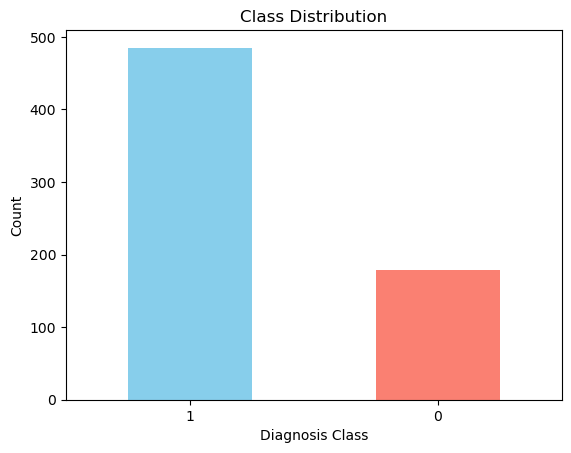

In [78]:
df['CLASS'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Diagnosis Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('my_plot_bar.png', dpi=300, bbox_inches='tight') 
plt.show()


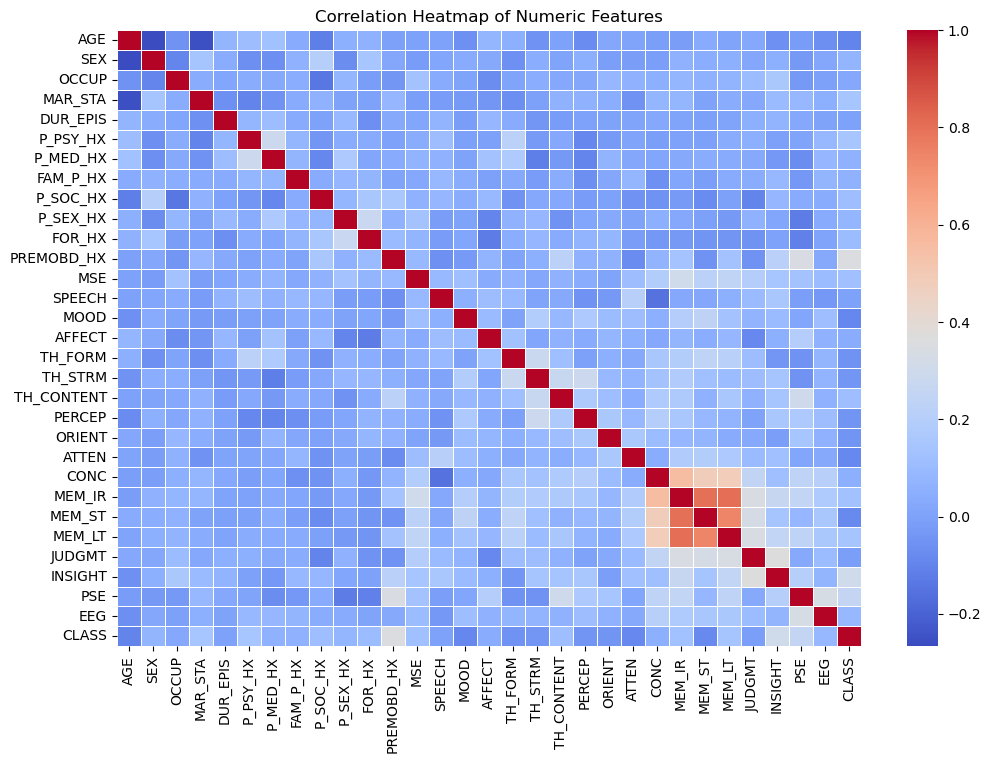

In [79]:
# Correlation matrix for numeric features
corr = df.select_dtypes('number').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight') 
plt.show()


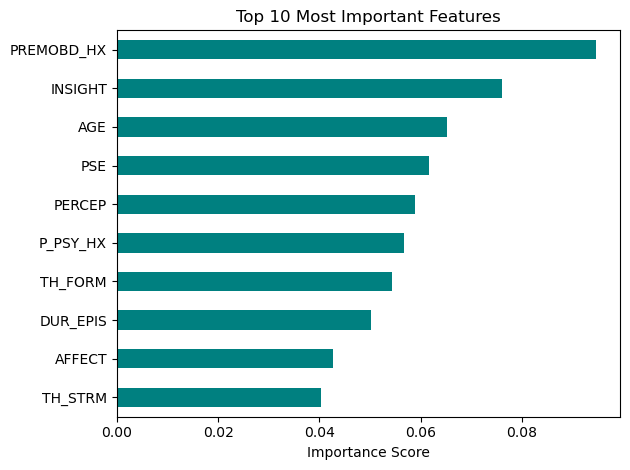

In [87]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
top_10 = feat_imp.nlargest(10)

# Plot
top_10.plot(kind='barh', color='teal')
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('my_plot_invert_bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
# Split into input and output
X = df.drop(columns=['CLASS'])
y = df['CLASS']


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [82]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
joblib.dump({
    "model": model,
    "encoders": label_encoders  # this is your dictionary of LabelEncoders
}, "schizo_model.pkl")

['schizo_model.pkl']

In [84]:
y_pred = model.predict(X_test)

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9172932330827067

Confusion Matrix:
 [[26 10]
 [ 1 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.83        36
           1       0.91      0.99      0.95        97

    accuracy                           0.92       133
   macro avg       0.93      0.86      0.89       133
weighted avg       0.92      0.92      0.91       133

